In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

coupe_1 = ['2.B53', '2.B54', '2.B55', '2.B56']
coupe_2 = ['2.B57', '2.B58', '2.B59', '2.B60']

In [28]:
testing = pd.read_excel('Data/TriggerCounts/Locus_sensors/2.B53.xlsx', skiprows=2)

In [29]:
testing.head()

,Unnamed: 0,Date,Count,RSSI,SNR
0,NaN,2024-04-01 03:40:45,NaN,-80,12.8
1,NaN,2024-04-01 09:59:02,1.0,-94,11.5
2,NaN,2024-04-01 10:04:01,0.0,-117,2.8
3,NaN,2024-04-01 10:09:01,0.0,-96,12.0
4,NaN,2024-04-01 10:14:01,0.0,-87,11.8


In [30]:
testing = testing[['Date', 'Count']]

In [31]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6627 entries, 0 to 6626
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    6627 non-null   datetime64[ns]
 1   Count   6440 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 103.7 KB


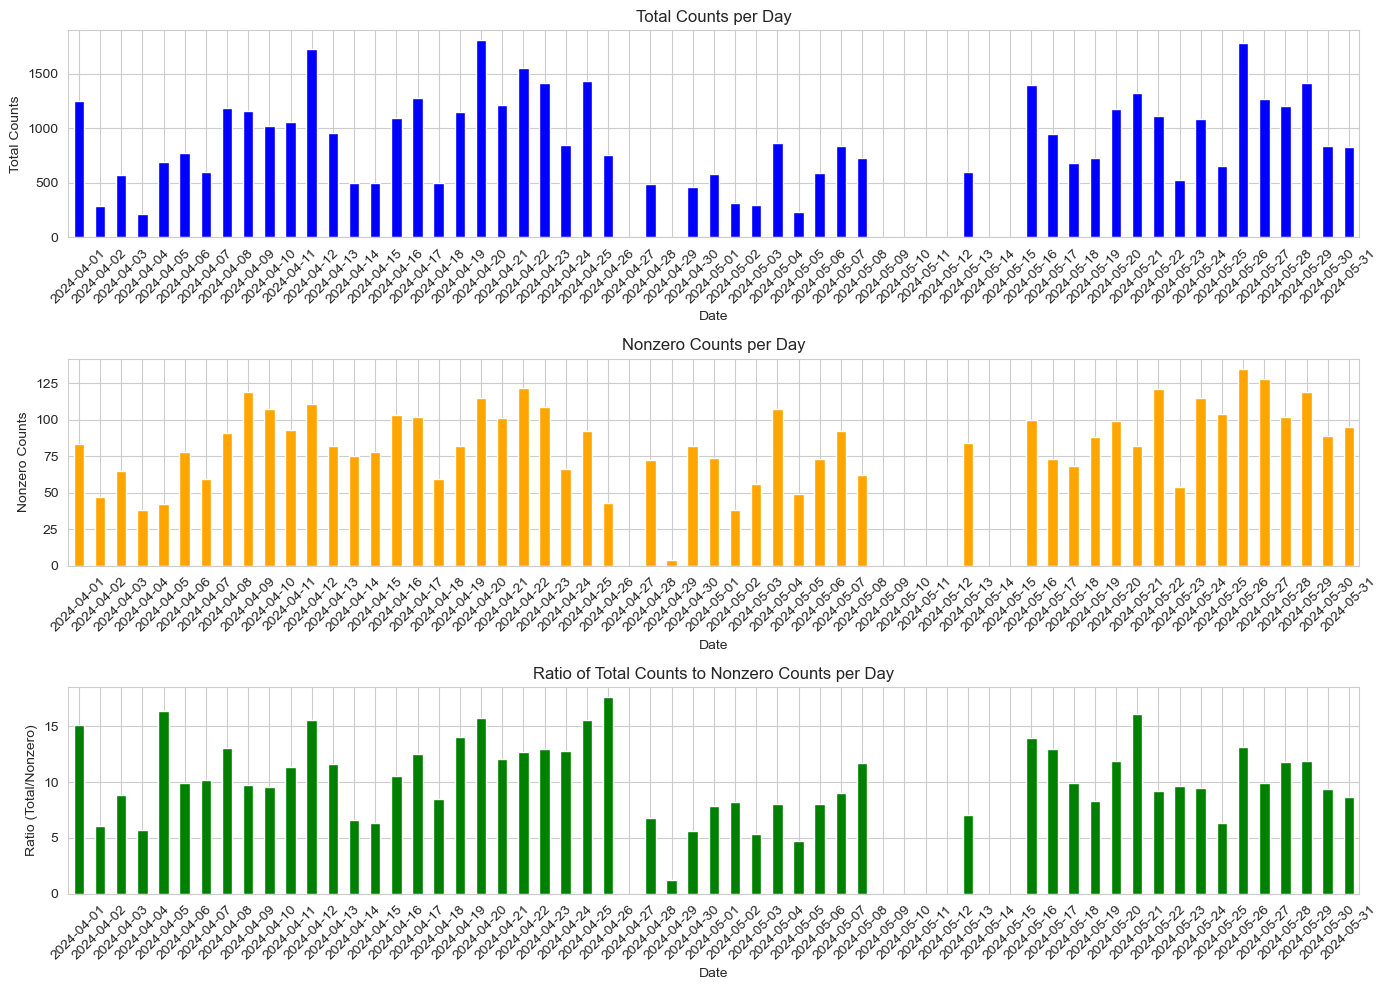

In [33]:

total_counts = testing.groupby(testing['Date'].dt.date)['Count'].sum()

nonzero_counts = testing[testing['Count'] > 0].groupby(testing['Date'].dt.date)['Count'].count()

daily_counts = pd.DataFrame({
    'Total Counts': total_counts,
    'Nonzero Counts': nonzero_counts
}).fillna(0) 

daily_counts['Ratio'] = daily_counts['Total Counts'] / daily_counts['Nonzero Counts']

plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
daily_counts['Total Counts'].plot(kind='bar', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Counts')
plt.title('Total Counts per Day')
plt.xticks(rotation=45)

plt.subplot(3, 1, 2)
daily_counts['Nonzero Counts'].plot(kind='bar', color='orange')
plt.xlabel('Date')
plt.ylabel('Nonzero Counts')
plt.title('Nonzero Counts per Day')
plt.xticks(rotation=45)

plt.subplot(3, 1, 3)
daily_counts['Ratio'].plot(kind='bar', color='green')
plt.xlabel('Date')
plt.ylabel('Ratio (Total/Nonzero)')
plt.title('Ratio of Total Counts to Nonzero Counts per Day')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


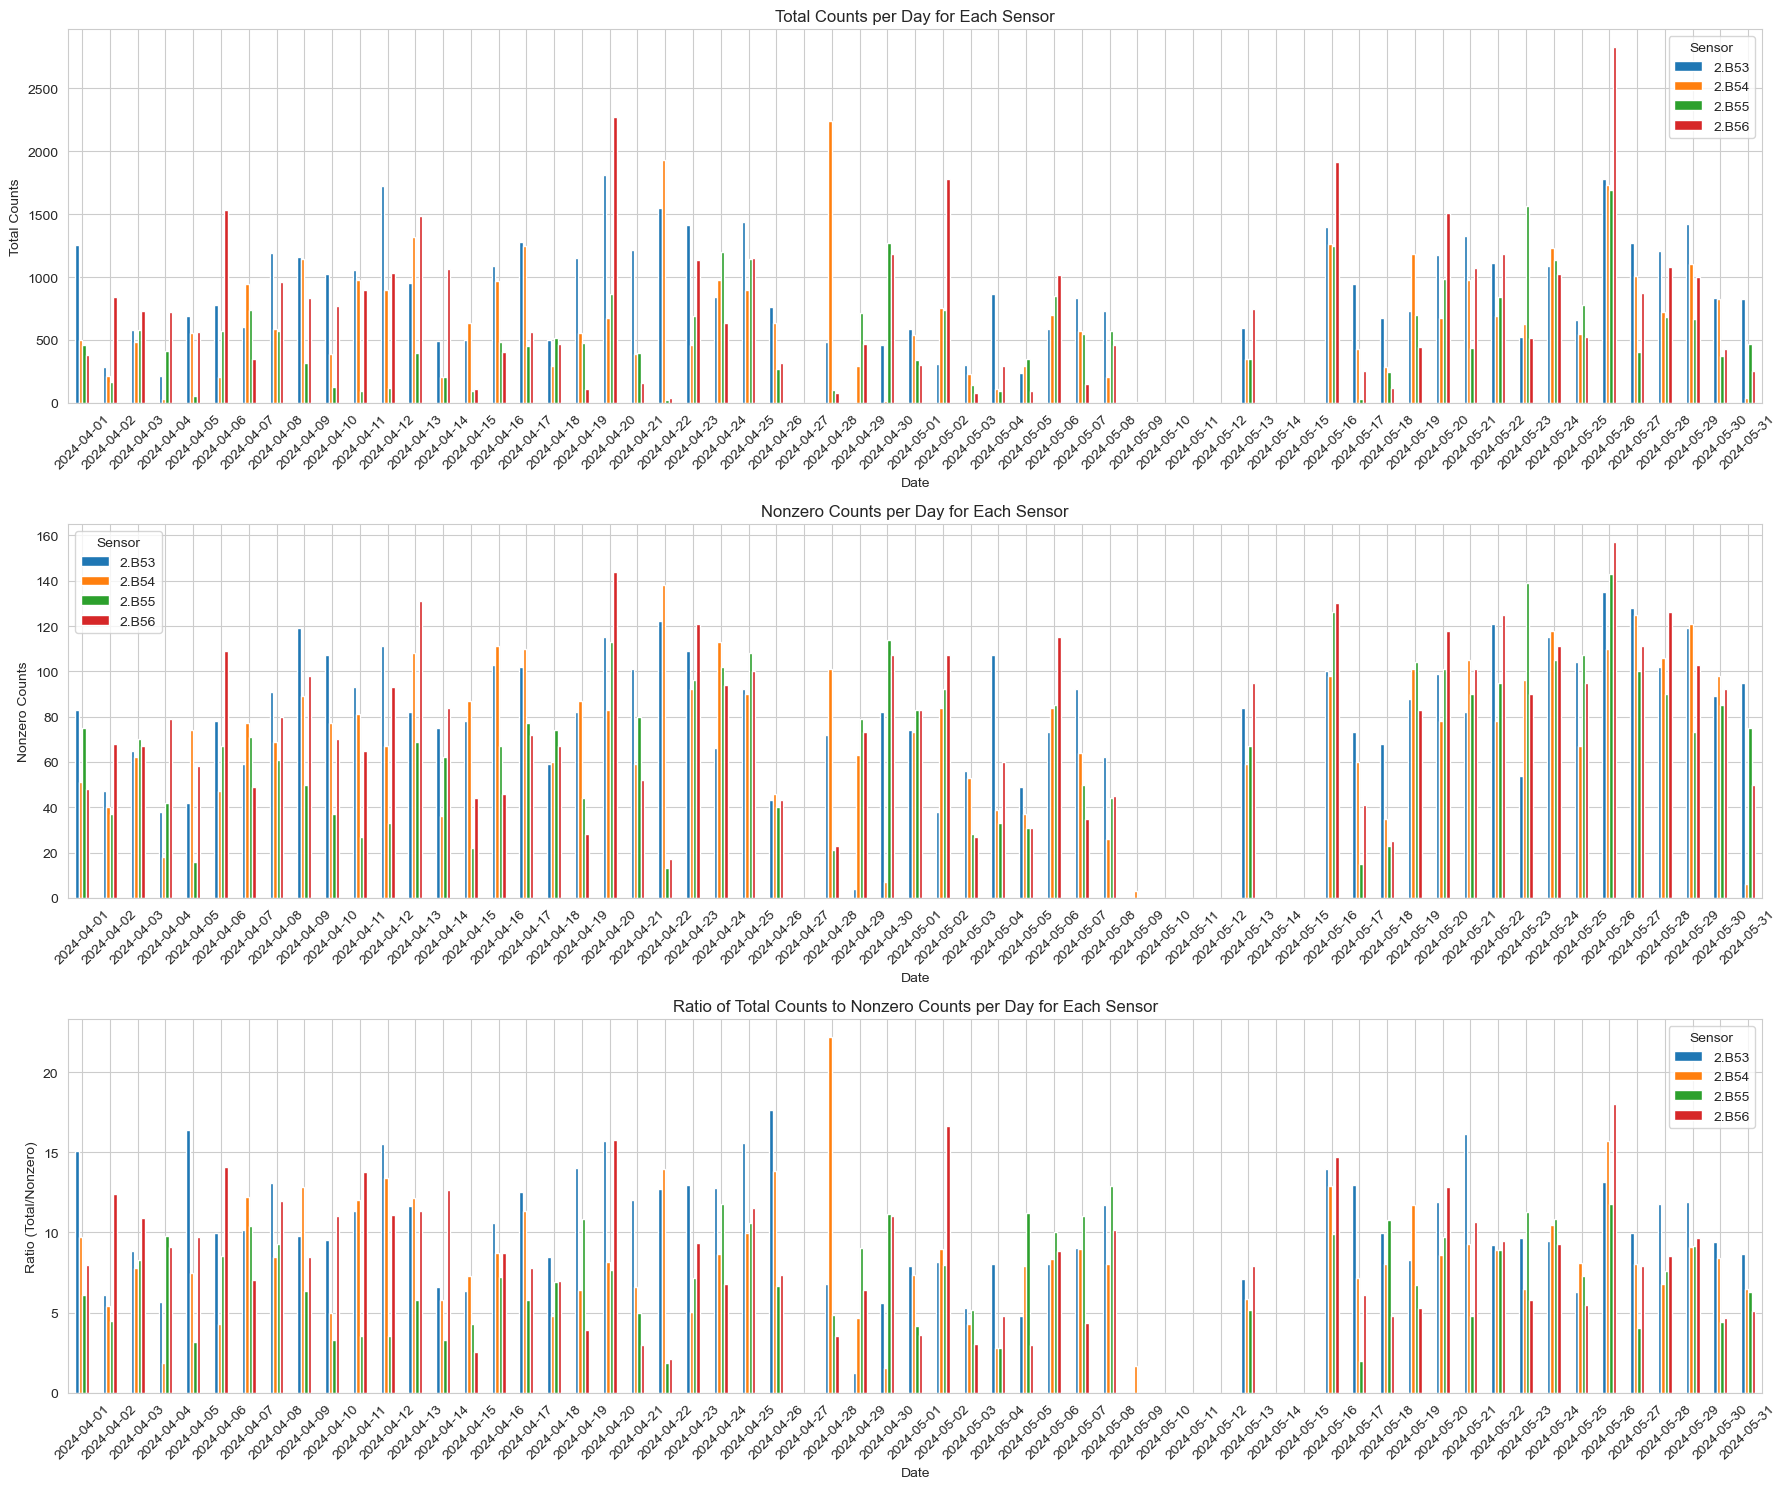

In [34]:
data_frames = {}
for sensor in coupe_1:
    data = pd.read_excel(f'Data/TriggerCounts/Locus_sensors/{sensor}.xlsx', skiprows=2)
    data = data[['Date', 'Count']]
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
    data.dropna(subset=['Date'], inplace=True)

    total_counts = data.groupby(data['Date'].dt.date)['Count'].sum()
    nonzero_counts = data[data['Count'] > 0].groupby(data['Date'].dt.date)['Count'].count()

    daily_counts = pd.DataFrame({
        'Total Counts': total_counts,
        'Nonzero Counts': nonzero_counts
    }).fillna(0)

    daily_counts['Ratio'] = daily_counts['Total Counts'] / daily_counts['Nonzero Counts']

    data_frames[sensor] = daily_counts

combined_data = pd.concat(data_frames, axis=1)
combined_data.columns = [f'{metric}_{sensor}' for sensor in coupe_1 for metric in ['Total Counts', 'Nonzero Counts', 'Ratio']]

fig, axes = plt.subplots(3, 1, figsize=(18, 15))

combined_data[[f'Total Counts_{sensor}' for sensor in coupe_1]].plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Total Counts')
axes[0].set_title('Total Counts per Day for Each Sensor')
axes[0].legend(coupe_1, title='Sensor')
axes[0].tick_params(axis='x', rotation=45)

combined_data[[f'Nonzero Counts_{sensor}' for sensor in coupe_1]].plot(kind='bar', ax=axes[1])
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Nonzero Counts')
axes[1].set_title('Nonzero Counts per Day for Each Sensor')
axes[1].legend(coupe_1, title='Sensor')
axes[1].tick_params(axis='x', rotation=45)


combined_data[[f'Ratio_{sensor}' for sensor in coupe_1]].plot(kind='bar', ax=axes[2])
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Ratio (Total/Nonzero)')
axes[2].set_title('Ratio of Total Counts to Nonzero Counts per Day for Each Sensor')
axes[2].legend(coupe_1, title='Sensor')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
